In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality-red.csv')


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

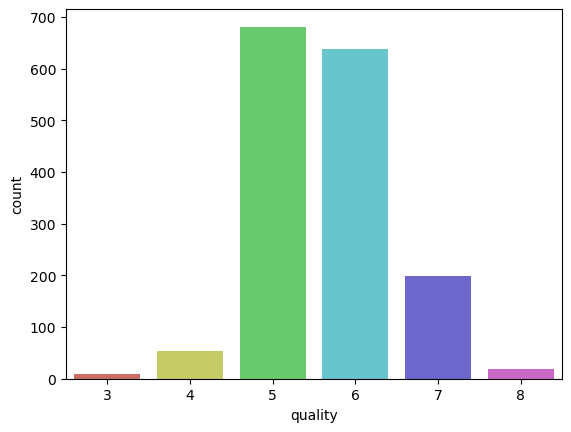

In [9]:
sns.countplot(x=df['quality'],palette='hls')

In [10]:
Num_fea=df.select_dtypes(exclude='object')

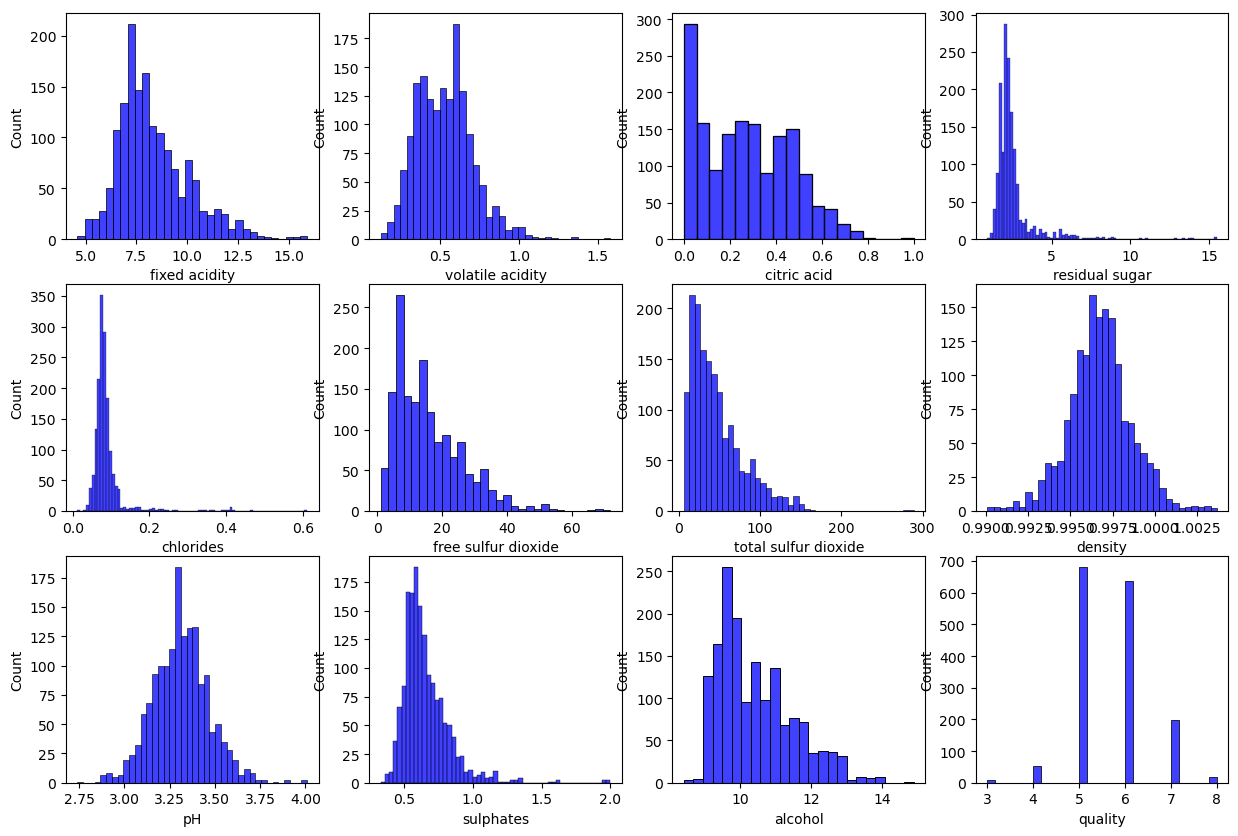

In [11]:

fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k=0
for i in range(3):#rows
    for j in range(4):#columns
        sns.histplot(df[df.columns[k]],ax=axes[i][j],color='blue')
        k+=1
plt.show()

In [12]:
df["residual sugar"]=np.log(df["residual sugar"])

In [13]:
df["chlorides"]=np.log(df["chlorides"])

In [14]:
df["free sulfur dioxide"]=np.log(df["free sulfur dioxide"])

In [15]:
df["total sulfur dioxide"]=np.log(df["total sulfur dioxide"])

In [16]:
df["sulphates"]=np.log(df["sulphates"])

In [17]:
Num_fea=df.select_dtypes(exclude='object')

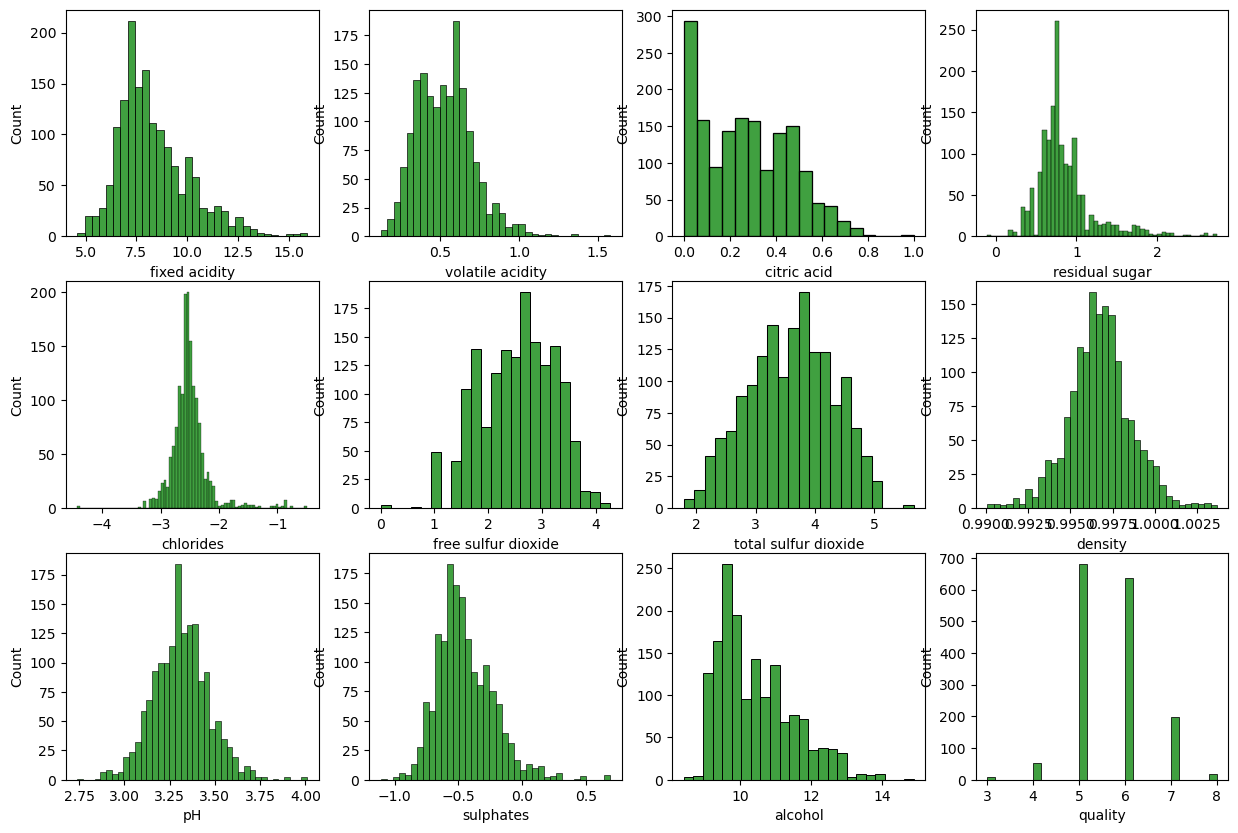

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k=0
for i in range(3):#rows
    for j in range(4):#columns
        sns.histplot(df[df.columns[k]],ax=axes[i][j],color='green')
        k+=1
plt.show()

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(240)

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
X=df.drop('quality',axis='columns')
X.head()

y=df['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [24]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE(k_neighbors=4)
# transform the dataset
X,y =oversample.fit_resample(X.fillna(0),y)
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,2.547871,3.604522,0.996709,3.309787,-0.444642,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,0.683899,0.711538,0.001869,0.155036,0.224199,1.082065,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996700,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,3.044522,4.143135,0.997820,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,14.900000,8.000000


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.537575,0.429041,-1.295090,-0.676807,-0.223313,0.047112,0.263025,0.695009,1.159296,-0.602217,-1.126538
1,-0.299950,1.132556,-1.295090,0.241263,0.583285,1.282437,1.242472,0.167551,-0.868979,0.286841,-0.795056
2,-0.299950,0.663546,-1.099832,-0.117592,0.382840,0.513801,0.931009,0.273042,-0.476410,0.080230,-0.795056
3,1.719863,-1.212495,1.438514,-0.676807,-0.265335,0.702133,1.083140,0.800501,-1.130692,-0.441531,-0.795056
4,-0.537575,0.272704,-1.295090,-0.835061,-0.265335,0.298478,0.497687,0.695009,1.159296,-0.602217,-1.126538


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc

61

In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

85

In [31]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

88

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

92

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

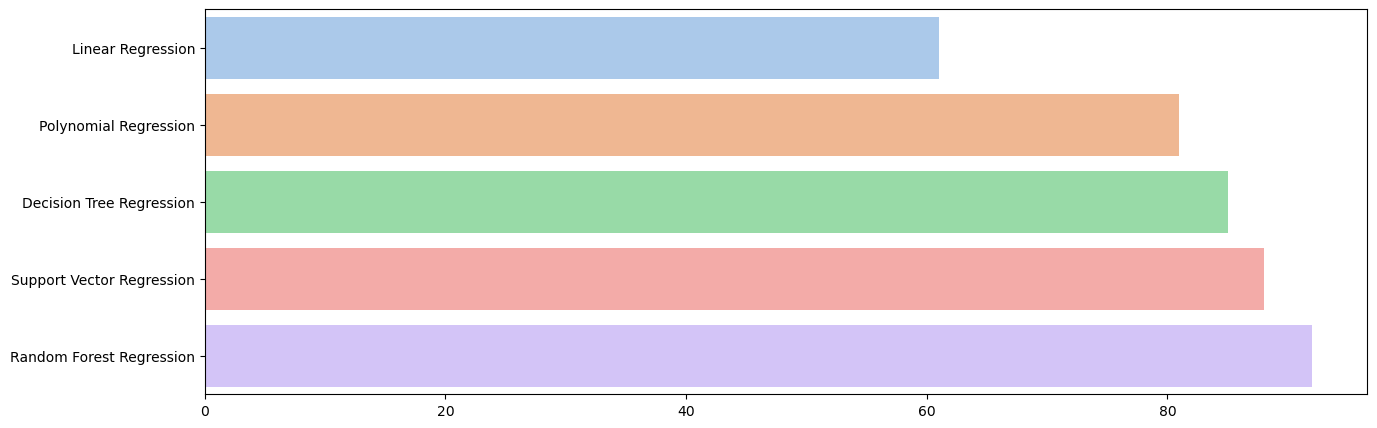

In [34]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LogReg_acc, PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


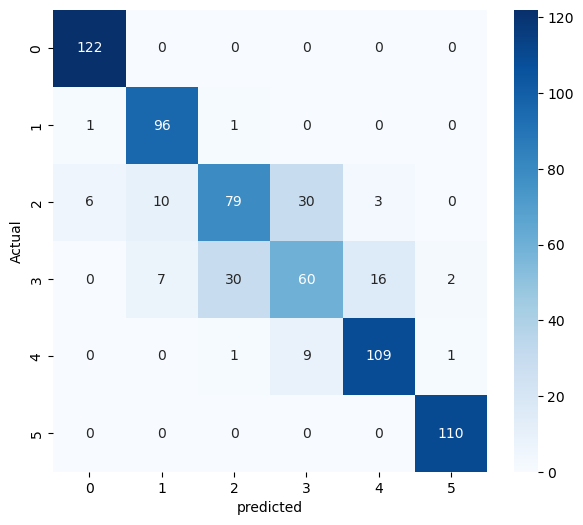

array([[122,   0,   0,   0,   0,   0],
       [  1,  96,   1,   0,   0,   0],
       [  6,  10,  79,  30,   3,   0],
       [  0,   7,  30,  60,  16,   2],
       [  0,   0,   1,   9, 109,   1],
       [  0,   0,   0,   0,   0, 110]])

In [37]:
from sklearn.metrics import confusion_matrix
try:
    if not('cm' in globals() and hasattr(cm, "ndim") and cm.ndim ==2):
        raise NameError
except NameError:
    cm = confusion_matrix(y_test,rf_model.predict(X_test))
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
cm

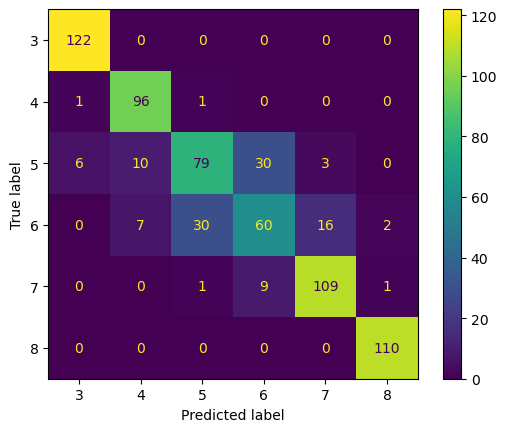

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_model.classes_)
cm_display.plot()
plt.show()
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':34.4,
    'volatile acidity':78.70,
    'citric acid':2.00,
    'residual sugar':5.6,
    'chlorides':1.9,
    'free sulfur dioxide':1.96,
    'total sulfur dioxide':89,
    'density':3,
    'pH':5,
    'sulphates':45.8,
    'alcohol':56.3
}

In [39]:
user_input= pd.DataFrame([feature_values],columns=feature_names)

In [40]:
user_input = scaler.transform(user_input)

In [41]:
prediction = rf_model.predict(user_input)

In [42]:
print("predicted value", prediction)
import pickle
filename = 'scaler_model.sav'
pickle.dump(scaler,open(filename,'wb'))

predicted value [5]


In [43]:
import pickle
filename = 'finalized_RFmodel.sav'
pickle.dump(rf_model,open(filename,'wb'))